In [189]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from collections import Counter
import folium #map
import matplotlib.pyplot as plt #color and graph
import matplotlib.cm as cm #color
import math
import random
import glob
import plotly.graph_objects as go

In [190]:
Phil = pd.read_csv('cleaned_files.csv', low_memory=False)
Phil2 = pd.read_csv('merged_files.csv', low_memory=False) #uncleaned file for stolen bikes

In [191]:
Weather = pd.read_csv("Weather_data_clean.csv", low_memory=False)

In [192]:
columns = Phil.columns
print(columns)
#print (Phil["start_coordinates"])
Phil.info()

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'end_station', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'Date_s', 'Weekday_s', 'Hour_s',
       'Date_e', 'Weekday_e', 'Hour_e', 'start_coordinates',
       'end_coordinates'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781474 entries, 0 to 1781473
Data columns (total 19 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   trip_id              int64 
 1   duration             int64 
 2   start_time           object
 3   end_time             object
 4   start_station        int64 
 5   end_station          int64 
 6   bike_id              object
 7   plan_duration        int64 
 8   trip_route_category  object
 9   passholder_type      object
 10  bike_type            object
 11  Date_s               object
 12  Weekday_s            int64 
 13  Hour_s               int64 
 14  Date_e               objec

In [193]:
# unique start station coordinations
unique_coordinates = Phil[["start_coordinates", "start_station"]].drop_duplicates().values.tolist()
print (unique_coordinates)
amount = len(unique_coordinates)
print (amount)


[['39.943909,-75.167351', 3125], ['39.95472,-75.183228', 3022], ['39.94561,-75.173477', 3066], ['39.947922,-75.162369', 3045], ['39.947319,-75.156952', 3052], ['39.955231,-75.166199', 3201], ['39.97121,-75.159698', 3039], ['39.953651,-75.14045', 3124], ['39.942181,-75.177467', 3012], ['39.96439,-75.179871', 3057], ['39.947109,-75.166183', 3010], ['39.964371,-75.165817', 3204], ['39.963791,-75.18158', 3212], ['39.93549,-75.167107', 3068], ['39.95425,-75.177612', 3061], ['39.948219,-75.209084', 3024], ['39.980049,-75.15522', 3031], ['39.940609,-75.149582', 3028], ['39.928139,-75.165154', 3164], ['39.953548,-75.171921', 3078], ['39.984921,-75.156677', 3210], ['39.962502,-75.174202', 3054], ['39.955109,-75.209869', 3074], ['39.928841,-75.170212', 3150], ['39.934311,-75.160423', 3098], ['39.942951,-75.159554', 3101], ['39.940769,-75.172272', 3203], ['39.953812,-75.174072', 3156], ['39.96664,-75.192093', 3104], ['39.940182,-75.154419', 3155], ['39.964111,-75.19973', 3067], ['39.96244,-75.161

In [194]:
#unique end station coordinations
unique_coordinates_end = Phil[['end_coordinates', "end_station"]].drop_duplicates().values.tolist()
print (unique_coordinates_end)
int2 = len(unique_coordinates_end)
print (int2)

[['39.925449,-75.159538', 3157], ['39.947109,-75.166183', 3010], ['39.955231,-75.166199', 3201], ['39.933151,-75.162483', 3034], ['39.962891,-75.166061', 3040], ['39.97121,-75.159698', 3039], ['39.940609,-75.149582', 3028], ['39.967442,-75.175072', 3051], ['39.934448,-75.145409', 3072], ['39.928841,-75.170212', 3150], ['39.955761,-75.189819', 3009], ['39.961731,-75.187881', 3071], ['39.980049,-75.15522', 3031], ['39.984921,-75.156677', 3210], ['39.92083,-75.170326', 3197], ['39.940189,-75.166908', 3086], ['39.955109,-75.209869', 3074], ['39.98003,-75.143707', 3017], ['39.937038,-75.150383', 3069], ['39.96759,-75.17952', 3102], ['39.93082,-75.174744', 3043], ['39.940182,-75.154419', 3155], ['39.953819,-75.142632', 3169], ['39.954861,-75.180908', 3161], ['39.94735,-75.148857', 3015], ['39.964371,-75.165817', 3204], ['39.95134,-75.173943', 3168], ['39.93549,-75.167107', 3068], ['39.963169,-75.147919', 3013], ['39.943909,-75.167351', 3125], ['39.937752,-75.180122', 3114], ['39.967178,-75.1

In [195]:
#coordinates
min_max = (Phil['start_coordinates'].min(), Phil['start_coordinates'].max())
print (min_max)

lat = (Phil2['start_lat'].min() + Phil2['start_lat'].max()) /2
print (lat)
lon = (Phil2['start_lon'].min() + Phil2['start_lon'].max()) / 2
print (lon)

('39.889938,-75.176788', '40.01112,-75.192871')
39.950529
-75.17551449999999


In [196]:
start_dict = dict(Phil)

In [197]:
map = folium.Map(location=[39.9505, -75.1755], zoom_start = 12)
map

In [198]:
# map with all stations
map = folium.Map(location=[39.95, -75.14], zoom_start = 12)

for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
 
    
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    folium.Marker(location = [lat, lon],
                  popup= f"{start_station}"
                   ).add_to(map)
map

In [199]:
# counter how many starts at station 
map2 = folium.Map(location=[39.95, -75.14], zoom_start = 12)


start_counter  = Counter(Phil['start_station'])
start_counter_list = list(start_counter.items())
start_counter_list.sort(key=lambda x: x[1], reverse=True)

for station, count in start_counter_list:
    print(f"Station {station}: {count}")

station_dict_start = dict(Phil.start_station.value_counts().sort_index())
#print(station_dict_start)


color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']


for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)

        
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    count = start_counter[start_station]
    popup_message = f"Station: {start_station}<br>Frequency: {count}"
    
    color_index = min(int(count / 4000), len(color_palette) - 1)
    marker_color = color_palette[color_index]

    
    
    folium.Marker(location = [lat, lon],
                  popup= popup_message,
                  icon=folium.Icon(color=marker_color)
                   ).add_to(map2)
    

map2

Station 3010: 31318
Station 3190: 29064
Station 3032: 28215
Station 3202: 27807
Station 3007: 27155
Station 3208: 26628
Station 3168: 26107
Station 3167: 25500
Station 3045: 25457
Station 3052: 25415
Station 3054: 25316
Station 3212: 24495
Station 3101: 22805
Station 3066: 22598
Station 3028: 22224
Station 3046: 21513
Station 3102: 21251
Station 3185: 20683
Station 3022: 20473
Station 3057: 20268
Station 3012: 19888
Station 3154: 19341
Station 3063: 17961
Station 3020: 16960
Station 3207: 16890
Station 3021: 16889
Station 3029: 16772
Station 3009: 16739
Station 3018: 16329
Station 3061: 16125
Station 3203: 15989
Station 3206: 15964
Station 3037: 15864
Station 3078: 15743
Station 3125: 15647
Station 3033: 15641
Station 3163: 15354
Station 3058: 15276
Station 3006: 14904
Station 3114: 14626
Station 3030: 14620
Station 3238: 14549
Station 3100: 14272
Station 3040: 14150
Station 3244: 14111
Station 3182: 13998
Station 3160: 13943
Station 3055: 13890
Station 3034: 13838
Station 3064: 13774


In [200]:
# counter how many ends at station - scale dark red to dark blue 
map3 = folium.Map(location=[39.95, -75.14], zoom_start = 12)


end_counter  = Counter(Phil['end_station'])
end_counter_list = list(end_counter.items())
end_counter_list.sort(key=lambda x: x[1], reverse=True)

#for station, count in end_counter_list:
#    print(f"Station {station}: {count}")

station_dict_end = dict(Phil.end_station.value_counts().sort_index())
#print(station_dict_end)


color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']


for end_coordinates, end_station in unique_coordinates_end:
    
    
    lat, lon = end_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)

        
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    count = end_counter[end_station]
    popup_message = f"Station: {end_station}<br>Frequency: {count}"
    
    color_index = min(int(count / 4000), len(color_palette) - 1)
    marker_color = color_palette[color_index]

    
    
    folium.Marker(location = [lat, lon],
                  popup= popup_message,
                  icon=folium.Icon(color=marker_color)
                   ).add_to(map3)
    

map3

In [201]:
# # bikes
unique_bikes = Phil["bike_id"].drop_duplicates().values.tolist()

amount_bikes = len(unique_bikes)
print (amount_bikes)

bike_counter  = Counter(Phil["bike_id"])
bike_counter_list = list(bike_counter.items())
bike_counter_list.sort(key=lambda x: x[1], reverse=False)

for bike_id, count in bike_counter_list:
    print(f"bike_id: {bike_id} : {count}")



2373
bike_id: 19621 : 1
bike_id: 3309 : 1
bike_id: WAND_ERIN_47 : 1
bike_id: WAND_LILRUSS_43 : 1
bike_id: WAND_PHIL_61 : 1
bike_id: WAND_CARA_45 : 1
bike_id: WAND_RUSSEL_46 : 1
bike_id: 22275 : 1
bike_id: WAND_DENISE : 1
bike_id: WAND_CARNIESHA : 1
bike_id: Cara45 : 2
bike_id: 23242 : 2
bike_id: 5407 : 3
bike_id: 27876 : 3
bike_id: 26124 : 3
bike_id: 25356 : 3
bike_id: 2574 : 4
bike_id: 27341 : 4
bike_id: 26484 : 4
bike_id: 23769 : 5
bike_id: 25654 : 5
bike_id: 24941 : 5
bike_id: 25193 : 5
bike_id: 27904 : 6
bike_id: 25971 : 6
bike_id: 17391 : 7
bike_id: 23153 : 8
bike_id: 22964 : 8
bike_id: 27322 : 8
bike_id: 26504 : 8
bike_id: 26388 : 8
bike_id: 24952 : 9
bike_id: 25286 : 9
bike_id: 27386 : 9
bike_id: 17794 : 10
bike_id: 26527 : 10
bike_id: 25758 : 10
bike_id: 18446 : 11
bike_id: 25354 : 11
bike_id: 22882 : 12
bike_id: 25179 : 12
bike_id: 5355 : 13
bike_id: 25313 : 13
bike_id: 23650 : 14
bike_id: 25692 : 14
bike_id: 27088 : 14
bike_id: 27653 : 14
bike_id: 27566 : 14
bike_id: 25960 : 

In [202]:
# Top 10 trips
popular_trips_group = Phil.groupby(["start_station", "end_station"]).size()
popular_trips = pd.DataFrame(popular_trips_group[popular_trips_group > 1000], columns=["count"])
popular_trips.reset_index(inplace=True)
popular_trips_sorted = popular_trips.sort_values(by= "count", ascending=False)
popular_trips_sorted.reset_index(drop=True, inplace=True)
popular_trips_sorted.head(20)

,start_station,end_station,count
0,3212,3212,7275
1,3202,3202,5116
2,3057,3057,3242
3,3208,3032,2409
4,3035,3009,2308
5,3020,3032,2079
6,3057,3212,1927
7,3009,3035,1856
8,3186,3186,1650
9,3054,3102,1622


In [40]:
#duration = 1440 uncleaned data
count_true = (Phil2["duration"] == 1440).sum()
print(count_true)

801


In [41]:
#duration = 1440 clean data
count_true = (Phil["duration"] == 1440).sum()
print(count_true)

320


In [42]:
# merged_data
Phil_1440minutes = Phil2[Phil2["duration"] == 1440 ]
selected_columns = ['start_station','start_lat', 'start_lon', "bike_type"]


start_station_count = Phil_1440minutes["start_station"].value_counts()

print("duration of 1440 minutes for column 'start_station':")
print(start_station_count.to_string())



duration of 1440 minutes for column 'start_station':
3057    28
3097    17
3185    16
3202    15
3046    14
3056    14
3049    13
3210    13
3110    12
3212    12
3190    12
3004    12
3108    11
3037    11
3158    11
3018    10
3160    10
3124    10
3078     9
3088     9
3039     9
3047     9
3045     9
3102     9
3101     9
3116     9
3007     8
3055     8
3029     8
3163     8
3255     8
3026     8
3021     8
3201     7
3041     7
3028     7
3161     7
3022     7
3066     7
3040     6
3182     6
3244     6
3017     6
3100     6
3068     6
3111     6
3075     6
3054     6
3123     6
3073     6
3012     5
3061     5
3125     5
3006     5
3196     5
3233     5
3152     5
3157     5
3032     5
3207     5
3024     5
3015     5
3187     4
3169     4
3120     4
3060     4
3156     4
3035     4
3031     4
3183     4
3226     4
3205     4
3070     4
3117     4
3170     4
3154     4
3211     4
3000     4
3107     4
3058     4
3064     4
3209     4
3166     4
3164     4
3249     4
3267     4
3

In [43]:
# cleaned data
Phil_1440minutes = Phil[Phil["duration"] == 1440 ]
selected_columns = ['start_station', "bike_type"]


start_station_count = Phil_1440minutes["start_station"].value_counts()

print("duration of 1440 minutes for column 'start_station':")
print(start_station_count.to_string())



duration of 1440 minutes for column 'start_station':
3057    9
3102    7
3021    6
3161    6
3046    6
3185    6
3255    6
3004    6
3116    5
3158    5
3108    5
3026    5
3045    5
3039    5
3202    4
3124    4
3029    4
3015    4
3037    4
3061    4
3201    4
3233    4
3078    4
3163    4
3212    4
3066    4
3210    4
3110    4
3049    3
3249    3
3244    3
3075    3
3101    3
3056    3
3069    3
3058    3
3246    3
3050    3
3072    3
3156    3
3055    3
3012    3
3097    3
3022    3
3054    3
3098    3
3074    3
3059    3
3100    3
3157    3
3040    2
3073    2
3190    2
3007    2
3241    2
3088    2
3035    2
3119    2
3068    2
3060    2
3014    2
3043    2
3154    2
3047    2
3063    2
3117    2
3205    2
3160    2
3071    2
3168    2
3152    2
3125    2
3207    2
3192    2
3169    2
3024    2
3064    2
3019    2
3211    2
3111    2
3120    2
3031    2
3164    2
3030    2
3051    2
3256    2
3267    1
3236    1
3107    1
3196    1
3213    1
3237    1
3099    1
3170    1
3033   

In [44]:
# map for duration == 1440 on uncleaned dataset
map4 = folium.Map(location=[39.9505, -75.1755], zoom_start = 12)

for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    stations_more_10_stolen = [3057, 3097, 3185, 3202, 3046, 3056, 3049, 3210, 3110, 3212, 3190, 3004, 3108, 3037, 3158, 3018, 3160, 3124]
   
    
    if start_station in stations_more_10_stolen:
        folium.Marker(location = [lat, lon],
                  popup= f"{start_station}",
                  icon=folium.Icon(color="red")
                   ).add_to(map4)
    
    else:
        folium.Marker(location = [lat, lon],
                  popup= f"{start_station}",
                  icon=folium.Icon(color="green")
                   ).add_to(map4)

    
map4

In [45]:
# average duration from start station
Phil_avg_duration = Phil.groupby(["start_station"])["duration"].mean()

print(Phil_avg_duration)

start_station
3004    24.112788
3005    21.169108
3006    19.815217
3007    14.590131
3008    16.751515
3009    16.723341
3010    15.937320
3011    17.099308
3012    13.093976
3013    16.748751
3014    17.625294
3015    18.881664
3016    17.475516
3017    21.478941
3018    21.416253
3019    20.304702
3020    12.611675
3021    15.271242
3022    16.934353
3024    24.264880
3025    13.889436
3026    18.746129
3028    17.384089
3029    16.987956
3030    13.776881
3031    21.104337
3032    13.638845
3033    15.068985
3034    14.300766
3035    13.728510
3037    18.607728
3038    14.232616
3039    18.313466
3040    14.626007
3041    22.433333
3043    15.619473
3045    17.073339
3046    19.339237
3047    22.555872
3049    27.628320
3050    18.812410
3051    18.418761
3052    14.348338
3053    17.716600
3054    16.297954
3055    20.924838
3056    20.944457
3057    36.364367
3058    15.725910
3059    17.012354
3060    19.293828
3061    15.636403
3062    17.337345
3063    13.160626
3064    14.266

In [46]:
count_true = (Phil["duration"] < 4).sum()
print(count_true)

82649


In [114]:
# data saved as new .csv for each season 

Phil["season"] = ""

for index, row in Phil.iterrows():
    
    date = row["Date_s"]
    month = int (date.split("-")[1])
    
    if 3 <= month <= 5:
        Phil.at[index, "season"] = "spring"
    elif 6 <= month <= 8:
         Phil.at[index, "season"] = "summer"
    elif 9 <= month <= 11:
         Phil.at[index, "season"] = "autumn"
    else:
         Phil.at[index, "season"] = "winter"
    
# because of long computing time build new dataframe for each season
for season in Phil["season"].unique():
    season_Phil = Phil[Phil["season"] == season]
    season_Phil.to_csv(f"{season}.csv", index=False)


In [203]:
#read season csv
Phil_winter = pd.read_csv('winter.csv', low_memory=False)
Phil_spring = pd.read_csv('spring.csv', low_memory=False)
Phil_summer = pd.read_csv('summer.csv', low_memory=False)
Phil_autumn = pd.read_csv('autumn.csv', low_memory=False)

In [181]:
#unique data winter
Phil_winter.nunique()

trip_id                207215
duration                  613
start_time             114828
end_time               114604
start_station             198
end_station               198
bike_id                  2200
plan_duration               5
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    180
Weekday_s                   7
Hour_s                     24
Date_e                    184
Weekday_e                   7
Hour_e                     24
start_coordinates         196
end_coordinates           196
season                      1
dtype: int64

In [50]:
#unique data spring
Phil_spring.nunique()

trip_id                392691
duration                  906
start_time             159129
end_time               158430
start_station             181
end_station               181
bike_id                  1700
plan_duration               4
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    184
Weekday_s                   7
Hour_s                     24
Date_e                    187
Weekday_e                   7
Hour_e                     24
start_coordinates         181
end_coordinates           181
season                      1
dtype: int64

In [51]:
#unique data summer
Phil_summer.nunique()

trip_id                551450
duration                  987
start_time             189348
end_time               188675
start_station             187
end_station               187
bike_id                  1963
plan_duration               4
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    184
Weekday_s                   7
Hour_s                     24
Date_e                    186
Weekday_e                   7
Hour_e                     24
start_coordinates         187
end_coordinates           187
season                      1
dtype: int64

In [52]:
#unique data autumn
Phil_autumn.nunique()

trip_id                527794
duration                  870
start_time             179129
end_time               178921
start_station             194
end_station               193
bike_id                  2120
plan_duration               4
trip_route_category         2
passholder_type             3
bike_type                   2
Date_s                    182
Weekday_s                   7
Hour_s                     24
Date_e                    184
Weekday_e                   7
Hour_e                     24
start_coordinates         192
end_coordinates           191
season                      1
dtype: int64

In [53]:
#trips on each season
trips_winter = Phil_winter["trip_id"].nunique()
trips_spring = Phil_spring["trip_id"].nunique()
trips_summer = Phil_summer["trip_id"].nunique()
trips_autumn = Phil_autumn["trip_id"].nunique()

print(f"Winter: {trips_winter}\nSpring: {trips_spring}\nSummer: {trips_summer}\nAutumn: {trips_autumn}")

Winter: 207215
Spring: 392691
Summer: 551450
Autumn: 527794


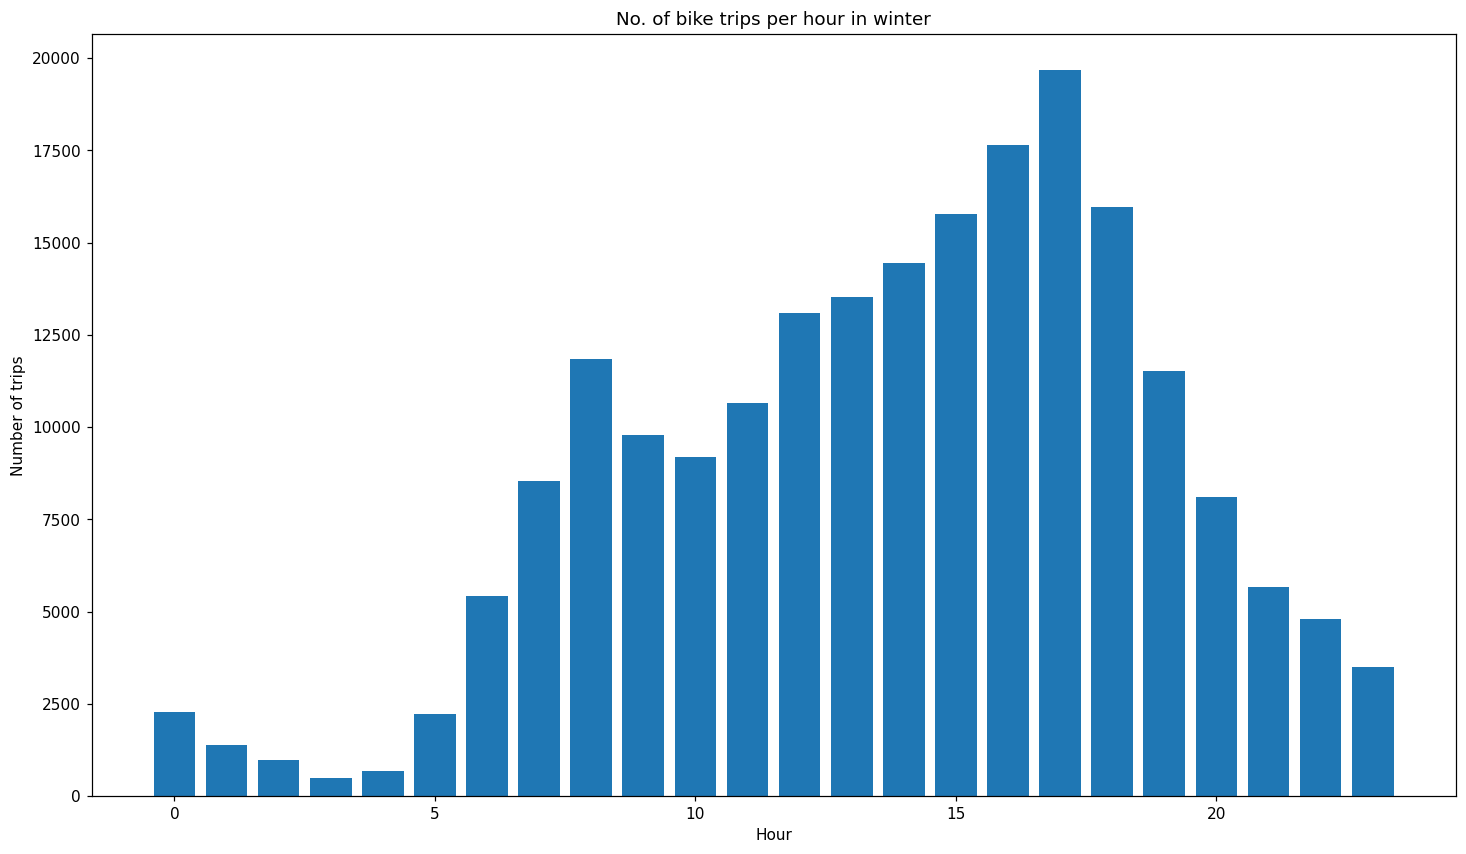

In [54]:
# Usage per hour winter
hour = Phil_winter.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in winter")
plt.xlabel("Hour")
plt.ylabel("Number of trips")


plt.show()

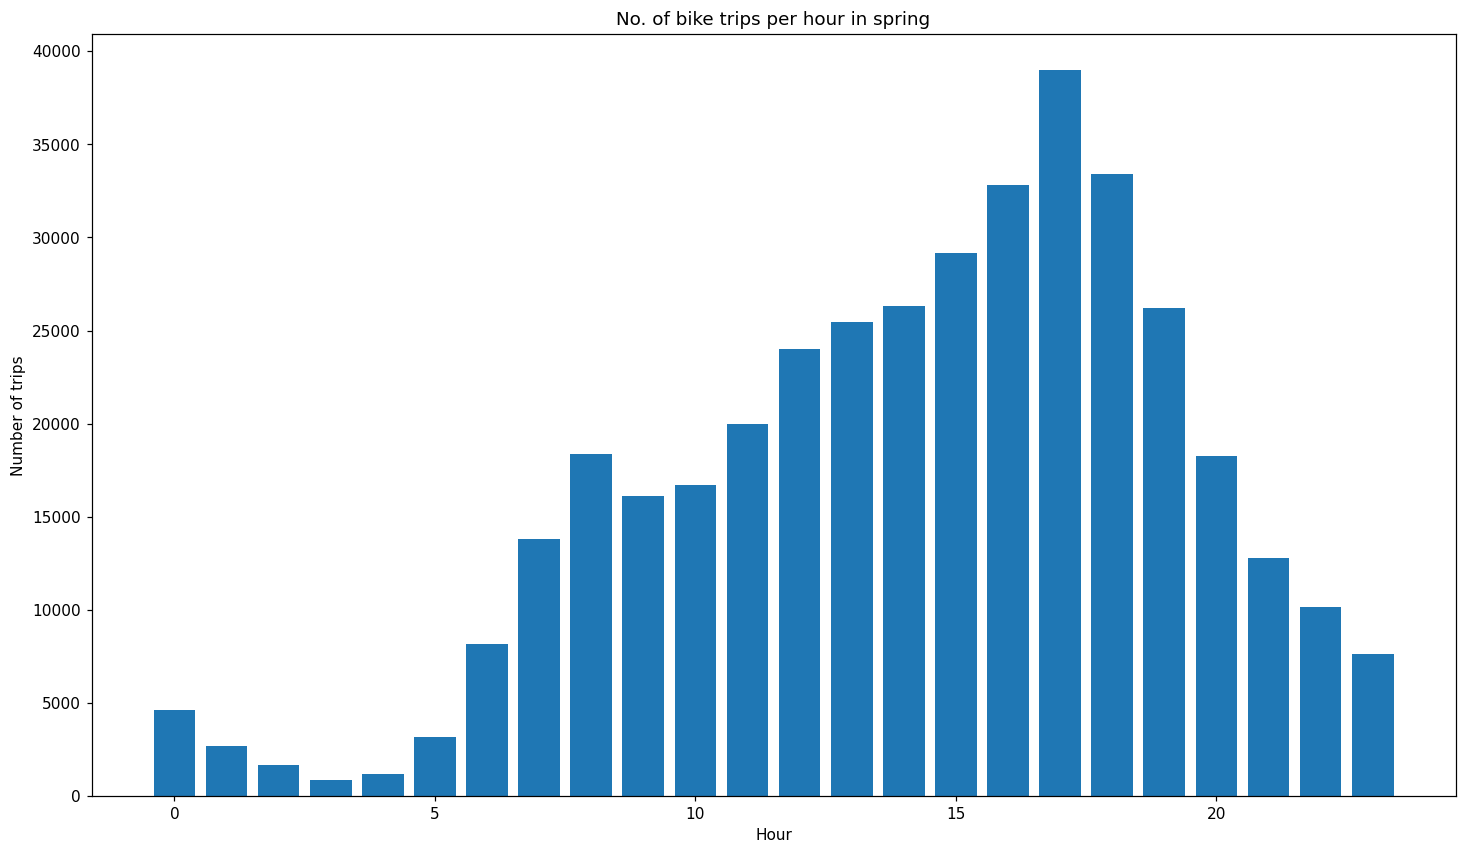

In [55]:
# Usage per hour spring
hour = Phil_spring.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in spring")
plt.xlabel("Hour")
plt.ylabel("Number of trips")


plt.show()

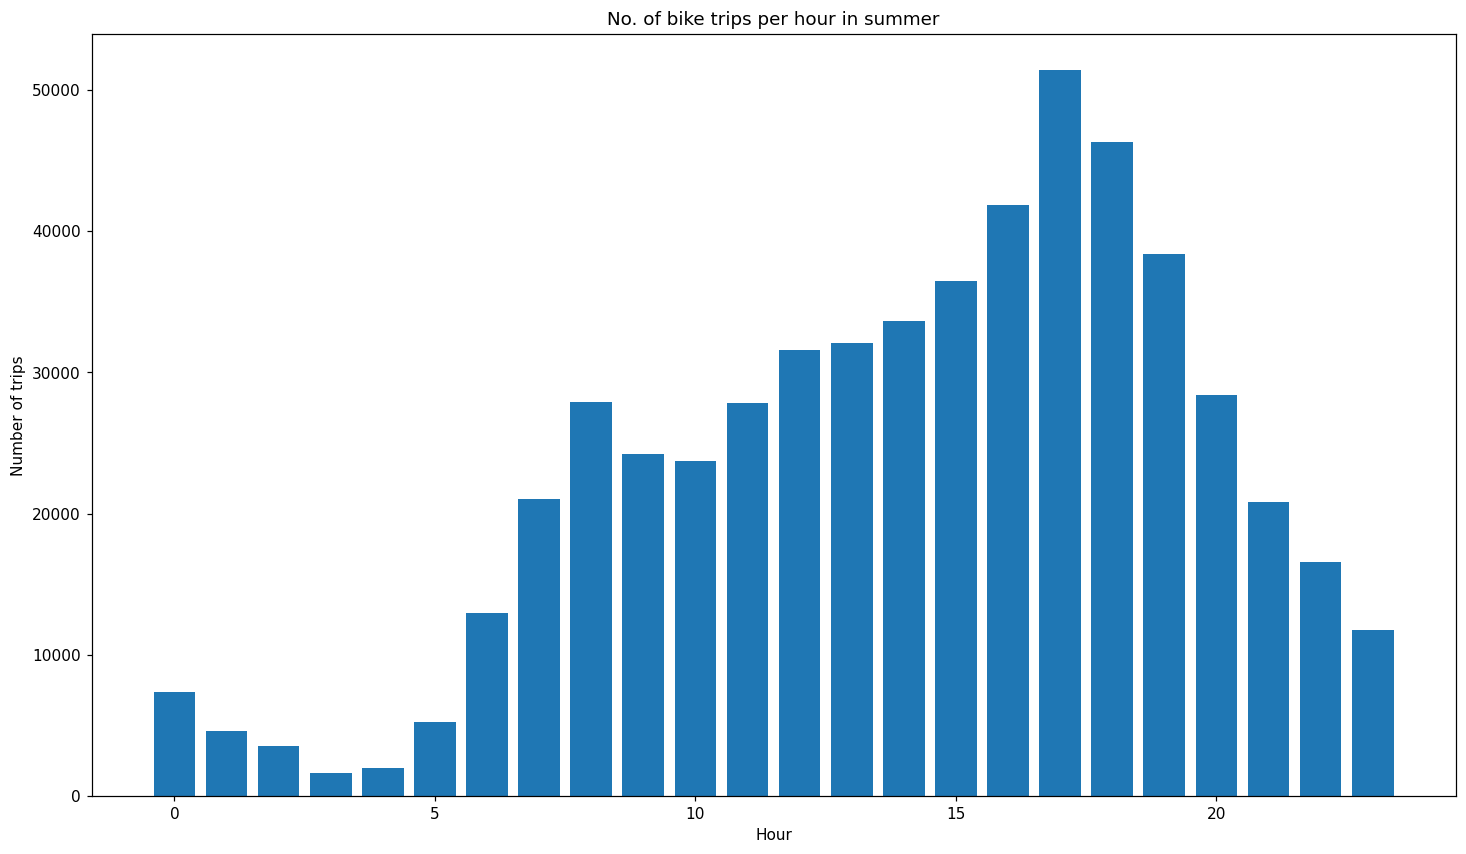

In [56]:
# Usage per hour summer
hour = Phil_summer.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in summer")
plt.xlabel("Hour")
plt.ylabel("Number of trips")


plt.show()

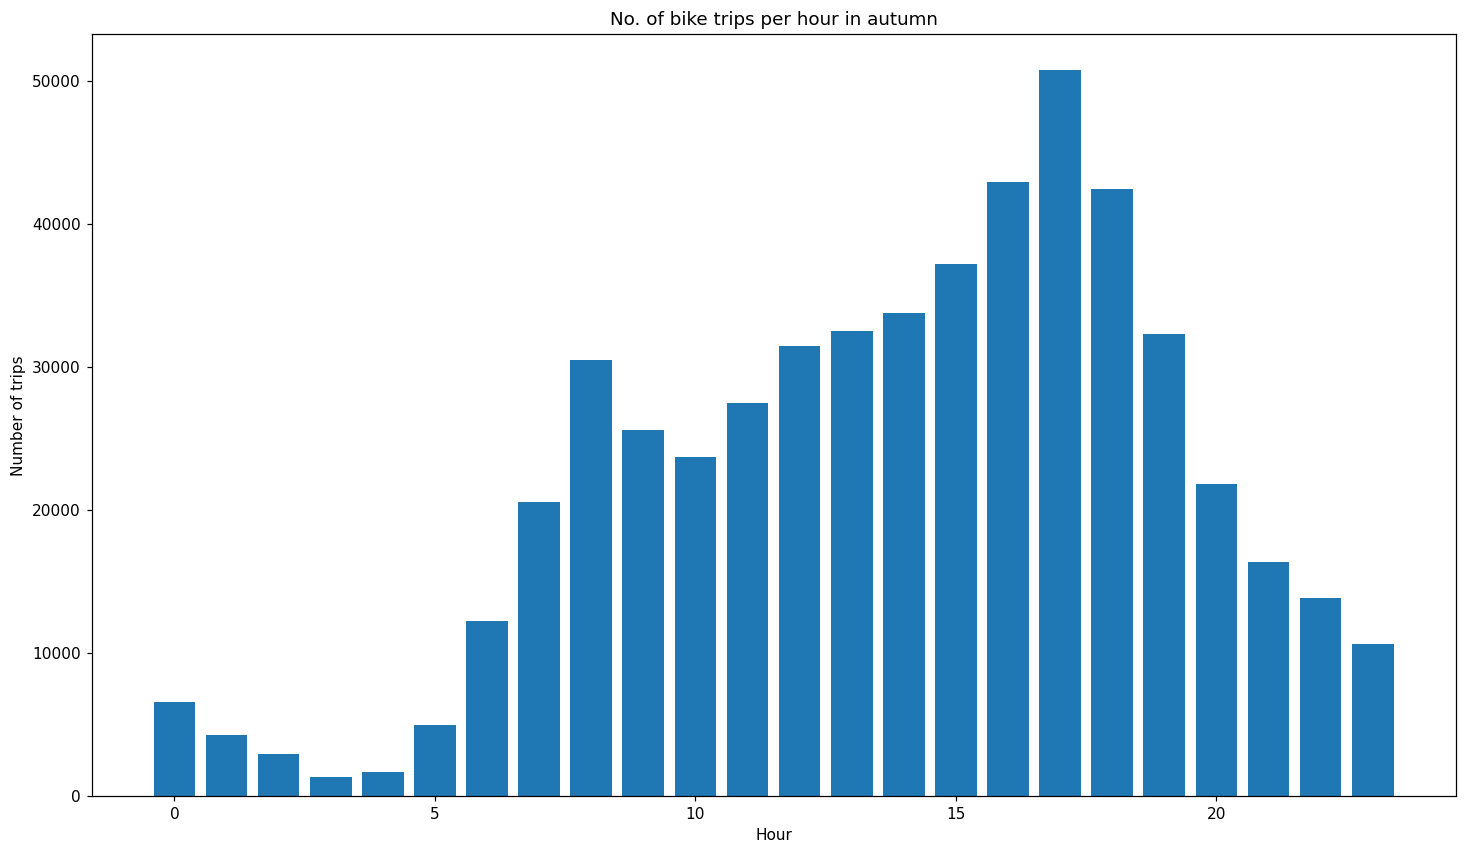

In [57]:
# Usage per hour autumn
hour = Phil_autumn.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in autumn")
plt.xlabel("Hour")
plt.ylabel("Number of trips")


plt.show()

As we can see each season is uniformly distributed. 
In this case we should schedule maintenance to seasons winter and spring. 

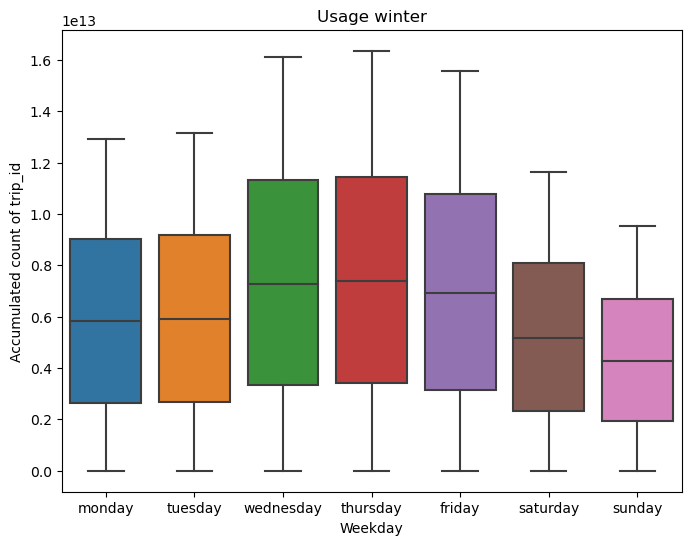

In [94]:
#boxplot of accumulated usage of bikes in winter
Phil_winter_bp = Phil_winter.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_winter["Weekday_s"], y=Phil_winter_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage winter")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])
plt.show()

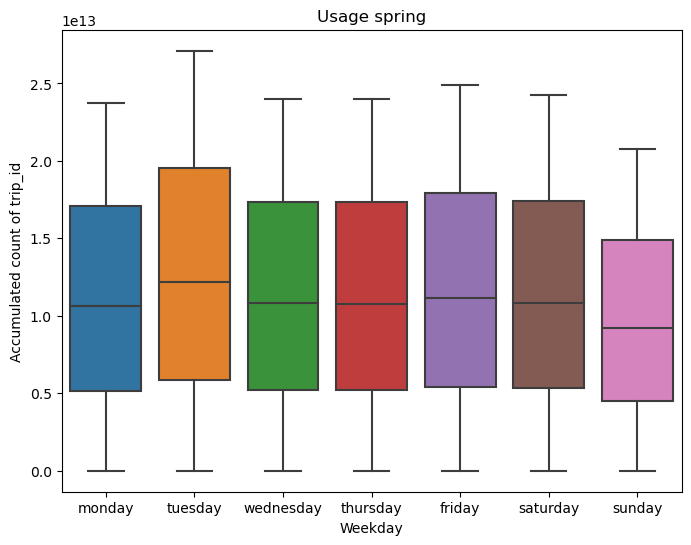

In [95]:
Phil_spring_bp = Phil_spring.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_spring["Weekday_s"], y=Phil_spring_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage spring")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])
plt.show()

In [58]:
#first date for each start station
first_start_station_date = Phil.groupby('start_station')['Date_e'].first().reset_index()
first_start_station_list = first_start_station_date.values.tolist()
first_start_station_date = first_start_station_date.sort_values('Date_e')
first_start_station_date.reset_index(drop=True, inplace=True)

#pd.set_option('display.max_rows', len(first_start_station_date)) #show all rows

first_start_station_date.head() # len(first_start_station_date)

,start_station,Date_e
0,3004,2021-01-01
1,3153,2021-01-01
2,3213,2021-01-01
3,3150,2021-01-01
4,3125,2021-01-01


In [68]:
#days of usage for each station
end_date = pd.to_datetime("2022-12-31")
first_start_station_date["days_of_usage"] = (end_date - pd.to_datetime(first_start_station_date['Date_e'])).dt.days

print(first_start_station_date)

     start_station      Date_e  days_of_usage
0             3004  2021-01-01            729
1             3153  2021-01-01            729
2             3213  2021-01-01            729
3             3150  2021-01-01            729
4             3125  2021-01-01            729
5             3124  2021-01-01            729
6             3121  2021-01-01            729
7             3120  2021-01-01            729
8             3119  2021-01-01            729
9             3118  2021-01-01            729
10            3117  2021-01-01            729
11            3116  2021-01-01            729
12            3115  2021-01-01            729
13            3114  2021-01-01            729
14            3112  2021-01-01            729
15            3108  2021-01-01            729
16            3107  2021-01-01            729
17            3106  2021-01-01            729
18            3104  2021-01-01            729
19            3102  2021-01-01            729
20            3101  2021-01-01    

In [70]:
# average usage per day for each station to the number of usage days

average_usage_per_day = {}
for start_station, count in start_counter.items():
    days_of_usage = first_start_station_date[first_start_station_date['start_station'] == start_station]['days_of_usage'].values[0]
    average_usage_per_day[start_station] = count / days_of_usage
    
sorted_average_usage_per_day = sorted(average_usage_per_day.items(), key=lambda x: x[1])

for start_station, average_usage in sorted_average_usage_per_day:
    print(f"start_station {start_station}: average daily usage {average_usage}")


start_station 3284: average daily usage 0.835820895522388
start_station 3282: average daily usage 0.8711656441717791
start_station 3298: average daily usage 0.9777777777777777
start_station 3096: average daily usage 1.151098901098901
start_station 3280: average daily usage 1.2339181286549707
start_station 3214: average daily usage 1.3813443072702332
start_station 3240: average daily usage 1.3953068592057762
start_station 3278: average daily usage 1.4702702702702704
start_station 3281: average daily usage 1.4871794871794872
start_station 3291: average daily usage 1.5172413793103448
start_station 3196: average daily usage 1.5349794238683128
start_station 3243: average daily usage 1.7190388170055453
start_station 3277: average daily usage 1.9047619047619047
start_station 3247: average daily usage 1.9220532319391634
start_station 3093: average daily usage 1.940934065934066
start_station 3181: average daily usage 1.967032967032967
start_station 3300: average daily usage 2.0
start_station 31

In [82]:
# map with average daily usage

average_usage_df = pd.DataFrame.from_dict(average_usage_per_day, orient="index", columns=["Average_daily_usage"])
average_usage_df.reset_index(inplace=True)
average_usage_df.rename(columns={"index": "start_station"}, inplace=True)

map5 = folium.Map(location=[39.95, -75.14], zoom_start=12)

color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']

for start_coordinates, start_station in unique_coordinates:
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
    average_usage = average_usage_df.loc[average_usage_df["start_station"] == start_station, "Average_daily_usage"].values[0]
    
    color_index = min(int(average_usage / 5), len(color_palette) - 1)
    marker_color = color_palette[color_index]
    
    popup_message = f"Station: {start_station}<br>Average Daily Usage: {average_usage}"
    
    folium.Marker(location=[lat, lon],
                  popup=popup_message,
                  icon=folium.Icon(color=marker_color)
                 ).add_to(map5)
map5

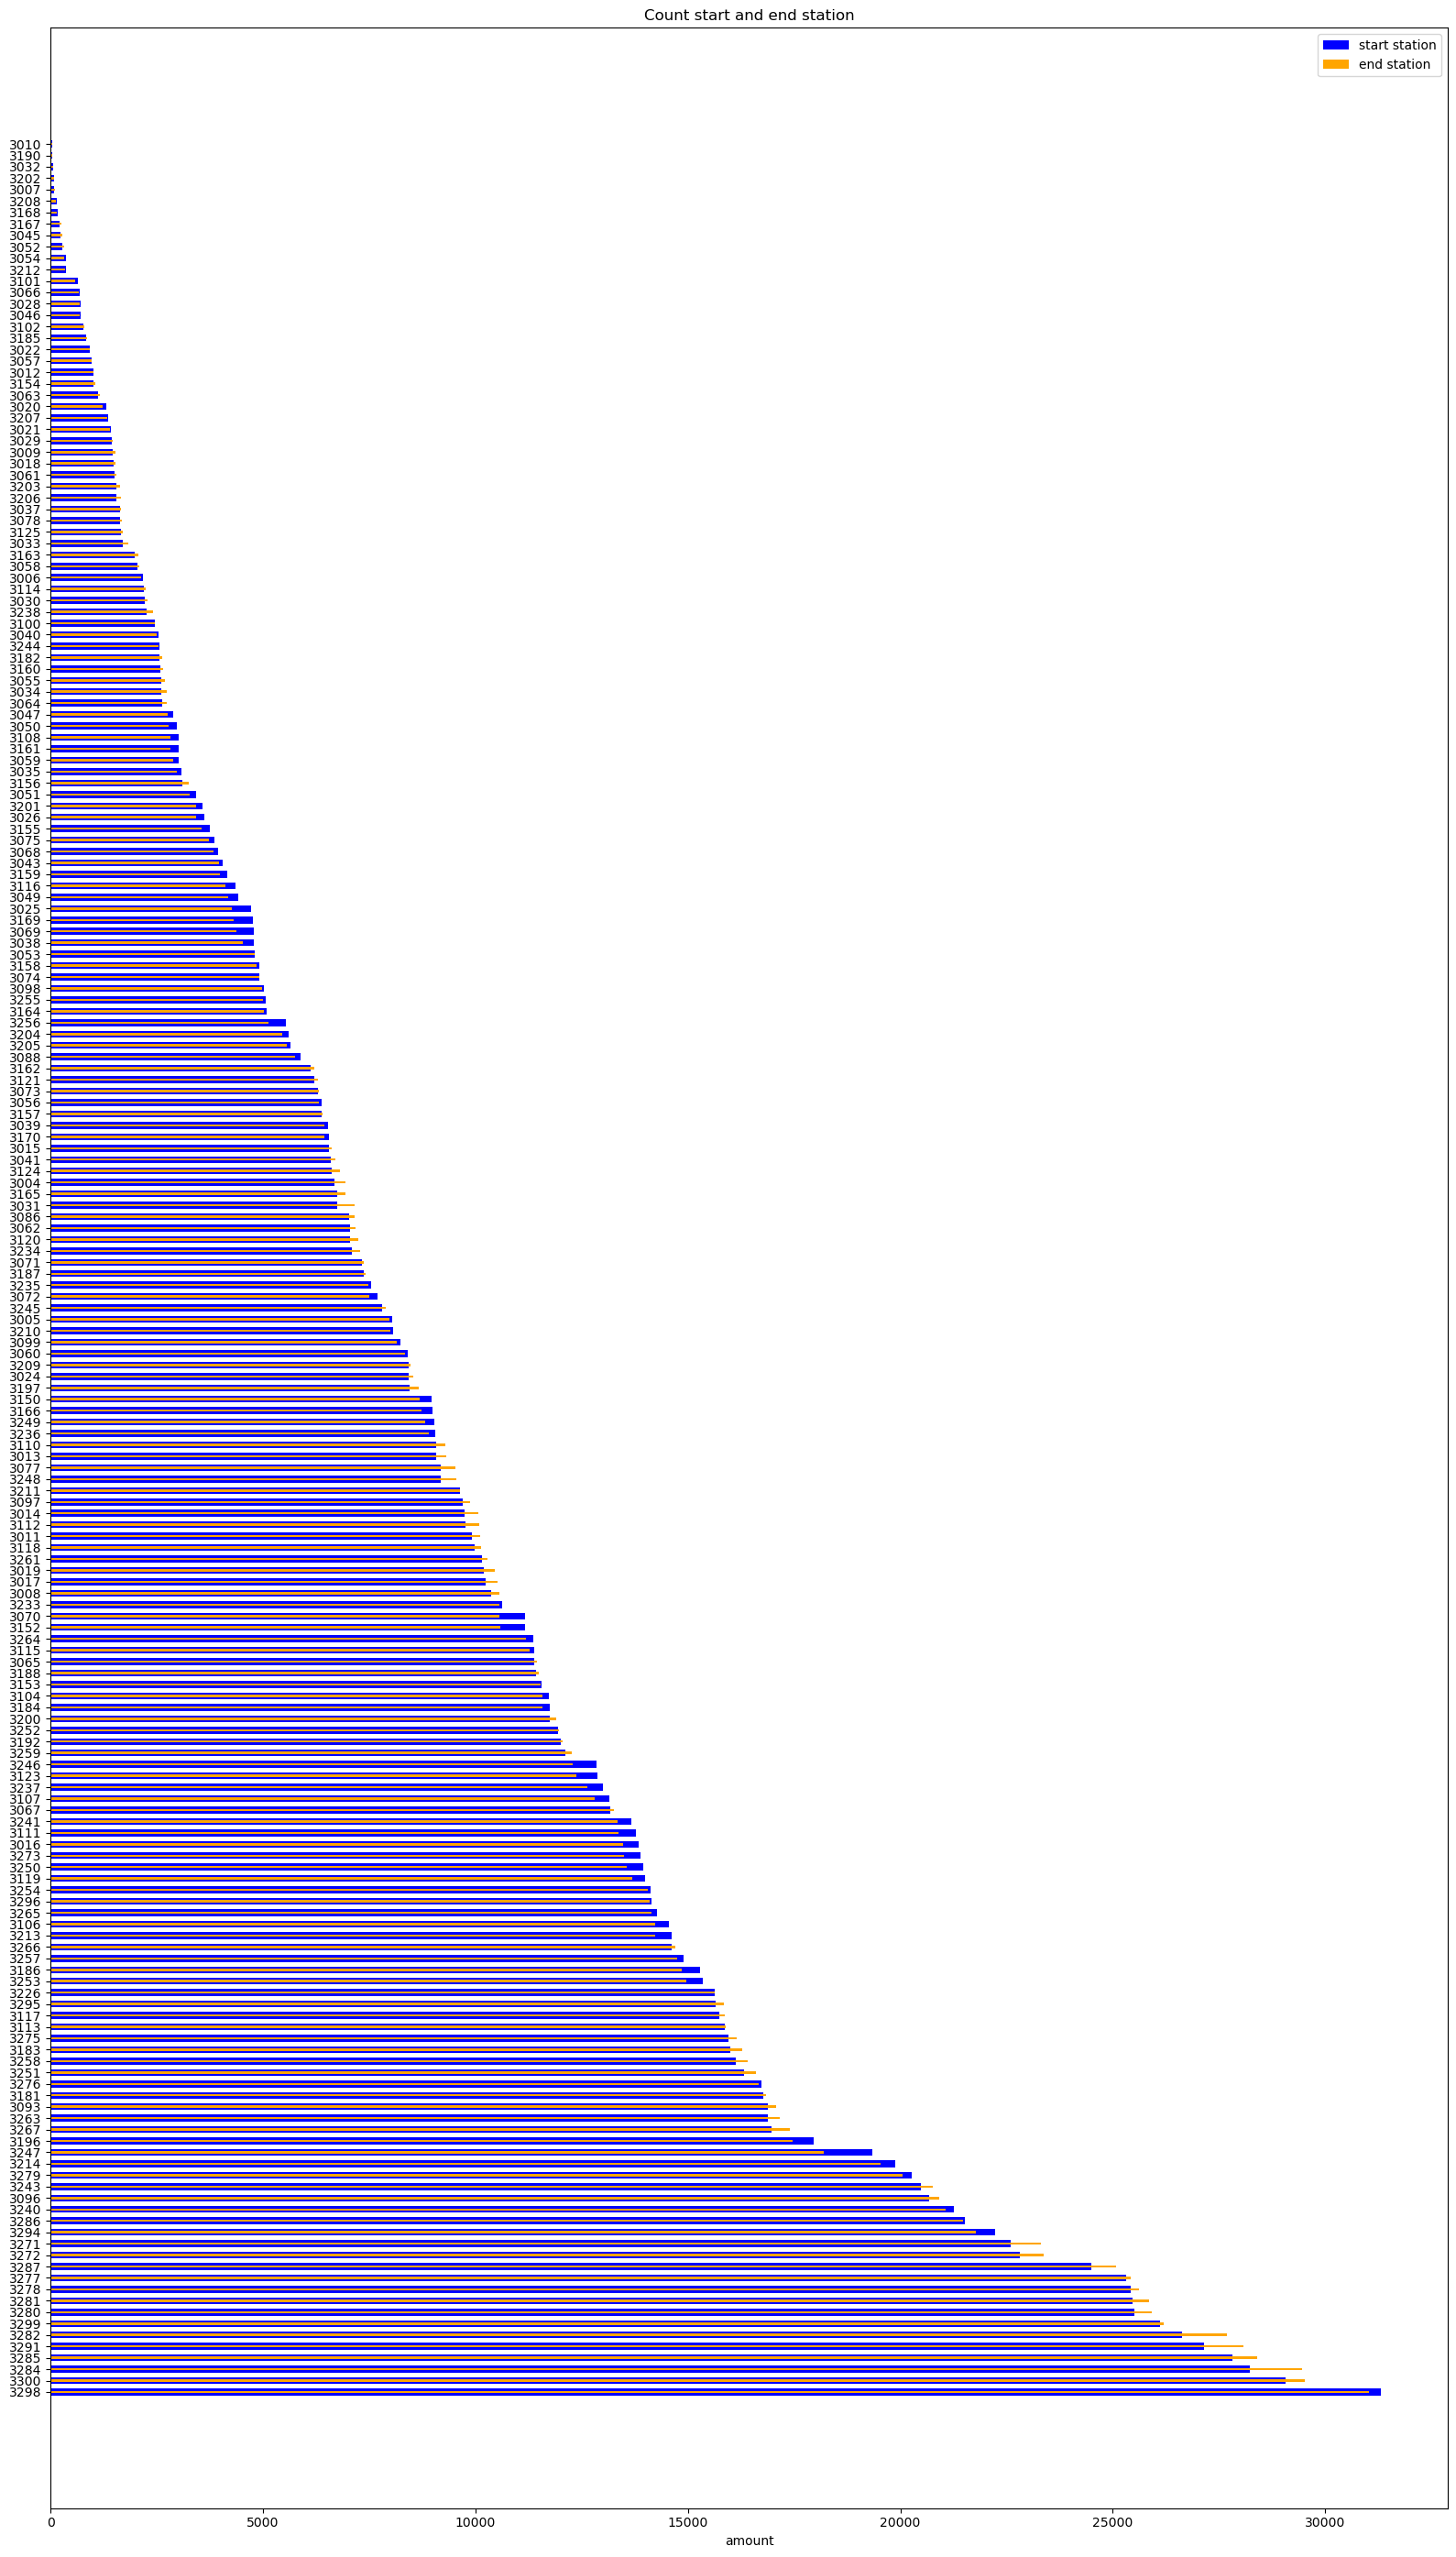

In [204]:
import matplotlib.pyplot as plt

start_counter = Counter(Phil['start_station'])
start_counter_list = list(start_counter.items())
start_counter_list.sort(key=lambda x: x[1], reverse=True)

start_stations = [item[0] for item in start_counter_list]
start_counts = [item[1] for item in start_counter_list]

end_counter = Counter(Phil['end_station'])
end_counter_list = list(end_counter.items())
end_counter_list.sort(key=lambda x: x[1], reverse=True)

end_stations = [item[0] for item in end_counter_list]
end_counts = [item[1] for item in end_counter_list]  # Multiply by -1 to make the bars go from right to left

fig, ax = plt.subplots(figsize=(16, 28))
bar_width = 0.6

start_bar = ax.barh(range(len(start_stations)), start_counts, bar_width, align='center', color='blue', label='start station')
end_bar = ax.barh(range(len(end_stations)), end_counts, bar_width/3, align='center', color='orange', label='end station')

ax.set_yticks(range(len(start_stations)))
ax.set_yticklabels(start_stations[::-1])  # Reverse the order of start stations for better readability

ax.axvline(x=0, color='black', linewidth=0.5)  # Add a vertical line at x=0

ax.set_xlabel('amount')
ax.set_title('Count start and end station')

ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
idle time = duration bike was dropped of at station until another bike is booked (in avg for every station) each season?

# bis hier hin danach nur komische Dinge zu idle_time

In [163]:
Phil.sort_values("start_time", inplace=True)

Phil["idle_time"] = Phil.groupby(["start_station", "bike_id"])["start_time"].shift(-1) - Phil["end_time"]

Phil["idle_time"] = Phil["idle_time"].dt.total_seconds() / 60

print(Phil[["start_station", "bike_id", "end_time", "start_time", "idle_time"]].head())




   start_station bike_id            end_time          start_time  idle_time
0           3125   14542 2021-01-01 00:20:00 2021-01-01 00:05:00    37275.0
1           3022    5294 2021-01-01 00:20:00 2021-01-01 00:06:00     9365.0
2           3066   14586 2021-01-01 00:40:00 2021-01-01 00:07:00   239542.0
3           3045   14683 2021-01-01 00:22:00 2021-01-01 00:13:00   205571.0
4           3052    3330 2021-01-01 00:50:00 2021-01-01 00:37:00    51401.0


In [164]:
Phil.sort_values("start_time", inplace=True)

Phil["idle_time"] = Phil.groupby(["start_station", "bike_id"])["end_time"].shift(-1) - Phil["start_time"]

Phil["idle_time"] = Phil["idle_time"].dt.total_seconds() / 60

print(Phil[["start_station", "bike_id", "end_time", "start_time", "idle_time"]].head())

   start_station bike_id            end_time          start_time  idle_time
0           3125   14542 2021-01-01 00:20:00 2021-01-01 00:05:00    37336.0
1           3022    5294 2021-01-01 00:20:00 2021-01-01 00:06:00     9386.0
2           3066   14586 2021-01-01 00:40:00 2021-01-01 00:07:00   239581.0
3           3045   14683 2021-01-01 00:22:00 2021-01-01 00:13:00   205623.0
4           3052    3330 2021-01-01 00:50:00 2021-01-01 00:37:00    51428.0


In [174]:


idle_time_df = Phil.groupby(["trip_id",'start_station']).apply(lambda x: x['start_time'].shift(-1) - x['end_time']).reset_index()
print(idle_time_df)
idle_time_df.columns = ['start_station', 'index', 'idle_time']

# Berechnung des Durchschnitts der idle_time für jede Station
average_idle_time = idle_time_df.groupby('start_station')['idle_time'].mean().reset_index()

# Ausgabe der Ergebnisse
print(average_idle_time)

KeyboardInterrupt: 

In [172]:
idle_time_df = Phil.groupby('end_station').apply(lambda x: x['start_time'].shift(-1) - x['end_time']).reset_index()
print(idle_time_df)
idle_time_df.columns = ['end_station', 'index', 'idle_time']

# Berechnung des Durchschnitts der idle_time für jede Station
average_idle_time = idle_time_df.groupby('end_station')['idle_time'].mean().reset_index()

# Ausgabe der Ergebnisse
print(average_idle_time)

         end_station  level_1                 0
0               3004      579   0 days 01:35:00
1               3004      778 -1 days +21:54:00
2               3004      776 -1 days +22:29:00
3               3004      853   0 days 00:27:00
4               3004     1035   0 days 00:18:00
...              ...      ...               ...
1781469         3300  1780495 -1 days +23:57:00
1781470         3300  1780496 -1 days +23:40:00
1781471         3300  1780498 -1 days +23:41:00
1781472         3300  1780500   0 days 22:58:00
1781473         3300  1781398               NaT

[1781474 rows x 3 columns]
     end_station                 idle_time
0           3004 0 days 01:39:12.947950253
1           3005 0 days 02:07:19.907640638
2           3006 0 days 00:55:52.005603893
3           3007 0 days 00:23:20.510856606
4           3008 0 days 03:35:00.849557522
5           3009 0 days 00:44:48.468930172
6           3010 0 days 00:18:11.343408629
7           3011 0 days 02:38:39.536842105
8        

In [186]:
idle_time_df = Phil.groupby(["end_station","trip_id", "end_time", "start_time"]).size()

print(idle_time_df)

idle_times = []

# Sortieren Sie den DataFrame nach end_time, um sicherzustellen, dass die Zeiten in aufsteigender Reihenfolge sind
idle_time_df = idle_time_df.sort_values("end_time")

# Iterieren Sie über die Gruppen im DataFrame
for (end_station, trip_id, end_time, start_time), count in idle_time_df.iteritems():
    # Suchen Sie die nächste start_time für die aktuelle end_time
    next_start_time = idle_time_df.loc[(end_station, trip_id), "start_time"].min()
    
    # Berechnen Sie die Zeitdifferenz zwischen end_time und next_start_time
    idle_time = next_start_time - end_time
    
    # Fügen Sie die Zeitdifferenz zur Liste idle_times hinzu
    idle_times.append(idle_time)

# Geben Sie die Liste idle_times aus
print(idle_times)

end_station  trip_id    end_time             start_time         
3004         365254837  2021-01-02 12:04:00  2021-01-02 11:51:00    1
             365259496  2021-01-02 15:03:00  2021-01-02 14:14:00    1
             365260934  2021-01-02 15:45:00  2021-01-02 13:39:00    1
             365260936  2021-01-02 15:45:00  2021-01-02 13:39:00    1
             365261393  2021-01-02 16:11:00  2021-01-02 15:30:00    1
                                                                   ..
3300         579268887  2022-12-30 20:23:00  2022-12-30 20:04:00    1
             579268889  2022-12-30 20:23:00  2022-12-30 20:03:00    1
             579268891  2022-12-30 20:23:00  2022-12-30 20:02:00    1
             579268892  2022-12-30 20:05:00  2022-12-30 20:01:00    1
             579482379  2022-12-31 19:52:00  2022-12-31 19:21:00    1
Length: 1679150, dtype: int64


C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\3144999558.py:8: FutureWarning:

In a future version of pandas all arguments of Series.sort_values will be keyword-only.



ValueError: No axis named end_time for object type Series

In [187]:
# Konvertieren Sie die Series idle_time_df in ein DataFrame
idle_time_df = idle_time_df.reset_index()

# Sortieren Sie den DataFrame nach end_time, um sicherzustellen, dass die Zeiten in aufsteigender Reihenfolge sind
idle_time_df = idle_time_df.sort_values("end_time")

# Leeren DataFrame erstellen, um die Ergebnisse zu speichern
result_df = pd.DataFrame(columns=["end_station", "trip_id", "end_time", "start_time", "idle_time"])

# Iterieren Sie über die Gruppen im DataFrame
for index, row in idle_time_df.iterrows():
    current_end_station = row["end_station"]
    current_trip_id = row["trip_id"]
    current_end_time = row["end_time"]
    current_start_time = row["start_time"]

    # Suchen Sie die nächste start_time für die aktuelle end_time
    next_start_time = idle_time_df[(idle_time_df["end_station"] == current_end_station) & (idle_time_df["trip_id"] == current_trip_id) & (idle_time_df["start_time"] > current_end_time)]["start_time"].min()

    # Berechnen Sie die Zeitdifferenz zwischen end_time und next_start_time
    idle_time = next_start_time - current_end_time

    # Fügen Sie die Ergebnisse zum result_df hinzu
    result_df = result_df.append({"end_station": current_end_station, "trip_id": current_trip_id, "end_time": current_end_time, "start_time": current_start_time, "idle_time": idle_time}, ignore_index=True)

# Geben Sie das result_df aus
print(result_df)

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Jen\AppData\Local\Temp\ipykernel_11472\796650309.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



KeyboardInterrupt: 

In [188]:

# Konvertieren Sie die Series idle_time_df in ein DataFrame
idle_time_df = idle_time_df.reset_index()

# Sortieren Sie den DataFrame nach end_time, um sicherzustellen, dass die Zeiten in aufsteigender Reihenfolge sind
idle_time_df = idle_time_df.sort_values("end_time")

# DataFrame erstellen, um die Ergebnisse zu speichern
result_df = pd.DataFrame(columns=["end_station", "trip_id", "end_time", "start_time", "idle_time"])

# Iterieren Sie über die Gruppen im DataFrame
for index, row in idle_time_df.iterrows():
    current_end_station = row["end_station"]
    current_trip_id = row["trip_id"]
    current_end_time = row["end_time"]
    current_start_time = row["start_time"]

    # Suchen Sie die nächste start_time für die aktuelle end_time
    next_start_time = idle_time_df[(idle_time_df["end_station"] == current_end_station) & (idle_time_df["trip_id"] == current_trip_id) & (idle_time_df["start_time"] > current_end_time)]["start_time"].min()

    # Berechnen Sie die Zeitdifferenz zwischen end_time und next_start_time
    idle_time = next_start_time - current_end_time

    # Fügen Sie die Ergebnisse zu result_df hinzu
    result_df = pd.concat([result_df, pd.DataFrame([[current_end_station, current_trip_id, current_end_time, current_start_time, idle_time]], columns=result_df.columns)], ignore_index=True)

# Geben Sie das result_df aus
print(result_df)

KeyboardInterrupt: 